# Modeling

In [1]:
# Imports
import pickle
import logging
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Logistic Grid Search

In [2]:
from sklearn.linear_model import LogisticRegression

def logistic_grid():
    """Logistic Regression Grid Search."""
    
    # Set up
    logging.getLogger().setLevel(logging.DEBUG)
    logging.info('Begin main')

    # Extract
    logging.info('Begin extract')
    df = pickle.load(open("df_music.pkl", "rb"))
    y = df['Artist']
    X = df.drop('Artist', axis = 1)
    logging.info('X shape: {}, y shape: {}'.format(X.shape, y.shape))

    # Transform
    logging.info('Begin Transformation')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 444)

    # Model
    logging.info('Begin model')
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('logistic', LogisticRegression())
    ])

    param_grid = {
        'scale__with_mean': [True, False],
        'scale__with_std': [True, False],
        'logistic__C': [0.0001, 0.001, 0.01, 0.1, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 5, 10, 100, 1000],
    }
    
    grid = GridSearchCV(pipe, cv=10, n_jobs=-1, param_grid=param_grid, scoring=make_scorer(accuracy_score))

    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)

    # Calculate different metrics
    print(metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred, digits=3))
    
    print('Best parameters set found on development set:')
    print(grid.best_params_)
    print()
    
    # Save
    #pickle.dump(grid, open('logistic_grid.pkl', 'wb'))
    #pickle.dump(y_preds, open('y_preds_log_grid.pkl', 'wb'))

if __name__ == '__main__':
    logistic_grid()

INFO:root:Begin main
INFO:root:Begin extract
INFO:root:X shape: (1774, 9), y shape: (1774,)
INFO:root:Begin Transformation
INFO:root:Begin model


0.801125703564728
             precision    recall  f1-score   support

 Nickelback      0.773     0.822     0.797       253
    Pitbull      0.830     0.782     0.805       280

avg / total      0.803     0.801     0.801       533

Best parameters set found on development set:
{'logistic__C': 1.1, 'scale__with_mean': False, 'scale__with_std': True}



# KNN Grid Search

In [3]:
from sklearn.neighbors import KNeighborsClassifier

def knn_grid():
    """KNN grid search."""
    
    # Set up
    logging.getLogger().setLevel(logging.DEBUG)
    logging.info('Begin main')

    # Extract
    logging.info('Begin extract')
    df = pickle.load(open("df_music.pkl", "rb"))
    y = df['Artist']
    X = df.drop('Artist', axis = 1)
    logging.info('X shape: {}, y shape: {}'.format(X.shape, y.shape))

    # Transform
    logging.info('Begin Transformation')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 444)

    # Model
    logging.info('Begin model')
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

    param_grid = {
        'scale__with_mean': [True, False],
        'scale__with_std': [True, False],
        'knn__n_neighbors': list(range(1,5)),
    }
    
    grid = GridSearchCV(pipe, cv=10, n_jobs=-1, param_grid=param_grid, scoring=make_scorer(accuracy_score))

    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)

    # Calculate different metrics
    print(metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred, digits=3))
    
    print('Best parameters set found on development set:')
    print(grid.best_params_)
    print()
    
    # Save
    #pickle.dump(grid, open('logistic_grid.pkl', 'wb'))
    #pickle.dump(y_preds, open('y_preds_log_grid.pkl', 'wb'))

if __name__ == '__main__':
    knn_grid()

INFO:root:Begin main
INFO:root:Begin extract
INFO:root:X shape: (1774, 9), y shape: (1774,)
INFO:root:Begin Transformation
INFO:root:Begin model


0.9118198874296435
             precision    recall  f1-score   support

 Nickelback      0.909     0.905     0.907       253
    Pitbull      0.915     0.918     0.916       280

avg / total      0.912     0.912     0.912       533

Best parameters set found on development set:
{'knn__n_neighbors': 1, 'scale__with_mean': True, 'scale__with_std': True}



# SVM Grid Search

In [4]:
from sklearn.svm import SVC

def svm_grid():
    """SVM grid search."""
    
    # Set up
    logging.getLogger().setLevel(logging.DEBUG)
    logging.info('Begin main')

    # Extract
    logging.info('Begin extract')
    df = pickle.load(open("df_music.pkl", "rb"))
    y = df['Artist']
    X = df.drop('Artist', axis = 1)
    logging.info('X shape: {}, y shape: {}'.format(X.shape, y.shape))

    # Transform
    logging.info('Begin Transformation')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 444)

    # Model
    logging.info('Begin model')
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('svm', SVC())
    ])

    param_grid = {
        'scale__with_mean': [True, False],
        'scale__with_std': [True, False],
        'svm__kernel': ['rbf'],
    }
    
    grid = GridSearchCV(pipe, cv=10, n_jobs=-1, param_grid=param_grid, scoring=make_scorer(accuracy_score))

    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)

    # Calculate different metrics
    print(metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred, digits=3))
    
    # Print best parameters
    print('Best parameters set found on development set:')
    print(grid.best_params_)
    print()
    
    # Save
    #pickle.dump(grid, open('grid.pkl', 'wb'))
    #pickle.dump(y_preds, open('y_preds.pkl', 'wb'))

if __name__ == '__main__':
    svm_grid()

INFO:root:Begin main
INFO:root:Begin extract
INFO:root:X shape: (1774, 9), y shape: (1774,)
INFO:root:Begin Transformation
INFO:root:Begin model


0.8968105065666041
             precision    recall  f1-score   support

 Nickelback      0.902     0.877     0.890       253
    Pitbull      0.892     0.914     0.903       280

avg / total      0.897     0.897     0.897       533

Best parameters set found on development set:
{'scale__with_mean': True, 'scale__with_std': True, 'svm__kernel': 'rbf'}



# Gaussian Naive Bayes Grid Search

In [5]:
from sklearn.naive_bayes import GaussianNB

logging.getLogger().setLevel(logging.DEBUG)

# Extract
logging.info('Begin extract')
df = pickle.load(open("df_music.pkl", "rb"))
y = df['Artist']
X = df.drop('Artist', axis = 1)
logging.info('X shape: {}, y shape: {}'.format(X.shape, y.shape))

# Transform
logging.info('Begin Transformation')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 444)

# Fit and predict
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Calculate different metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, digits=3))

INFO:root:Begin extract
INFO:root:X shape: (1774, 9), y shape: (1774,)
INFO:root:Begin Transformation


0.7654784240150094
             precision    recall  f1-score   support

 Nickelback      0.704     0.874     0.780       253
    Pitbull      0.854     0.668     0.749       280

avg / total      0.783     0.765     0.764       533



# Decision Tree Grid Search

In [6]:
from sklearn.tree import DecisionTreeClassifier

logging.getLogger().setLevel(logging.DEBUG)

# Extract
logging.info('Begin extract')
df = pickle.load(open("df_music.pkl", "rb"))
y = df['Artist']
X = df.drop('Artist', axis = 1)
logging.info('X shape: {}, y shape: {}'.format(X.shape, y.shape))

# Transform
logging.info('Begin Transformation')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 444)

# Fit and predict
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# Calculate different metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, digits=3))

INFO:root:Begin extract
INFO:root:X shape: (1774, 9), y shape: (1774,)
INFO:root:Begin Transformation


0.874296435272045
             precision    recall  f1-score   support

 Nickelback      0.858     0.881     0.869       253
    Pitbull      0.890     0.868     0.879       280

avg / total      0.875     0.874     0.874       533



# Random Forest Grid Search

In [7]:
from sklearn.ensemble import RandomForestClassifier

logging.getLogger().setLevel(logging.DEBUG)

# Extract
logging.info('Begin extract')
df = pickle.load(open("df_music.pkl", "rb"))
y = df['Artist']
X = df.drop('Artist', axis = 1)
logging.info('X shape: {}, y shape: {}'.format(X.shape, y.shape))

# Transform
logging.info('Begin Transformation')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 444)

# Fit and predict
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Calculate different metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, digits=3))

INFO:root:Begin extract
INFO:root:X shape: (1774, 9), y shape: (1774,)
INFO:root:Begin Transformation


0.9193245778611632
             precision    recall  f1-score   support

 Nickelback      0.913     0.917     0.915       253
    Pitbull      0.925     0.921     0.923       280

avg / total      0.919     0.919     0.919       533



# Keras
https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [8]:
# Plot model accuracy and loss
def plot_model_history(model_history):
    
    fig, axs = plt.subplots(1,2,figsize=(21,7))
    label_fontsize = 16
    
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy', fontsize=20)
    axs[0].set_ylabel('Accuracy', fontsize = label_fontsize)
    axs[0].set_xlabel('Epoch', fontsize = label_fontsize)
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss', fontsize=20)
    axs[1].set_ylabel('Loss', fontsize = label_fontsize)
    axs[1].set_xlabel('Epoch', fontsize = label_fontsize)
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    fig.savefig('Keras Librosa Features.jpg')

In [9]:
# Imports
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Extract
df = pickle.load(open("df_music.pkl", "rb"))
y = df['Artist']
X = df.drop('Artist', axis = 1)

# Scale the features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# One-hot encode 
# y_dummies = pd.get_dummies(y)

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, encoded_y, test_size=.3, random_state = 444)

C:\Users\Owen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead


 32/533 [>.............................] - ETA: 0s

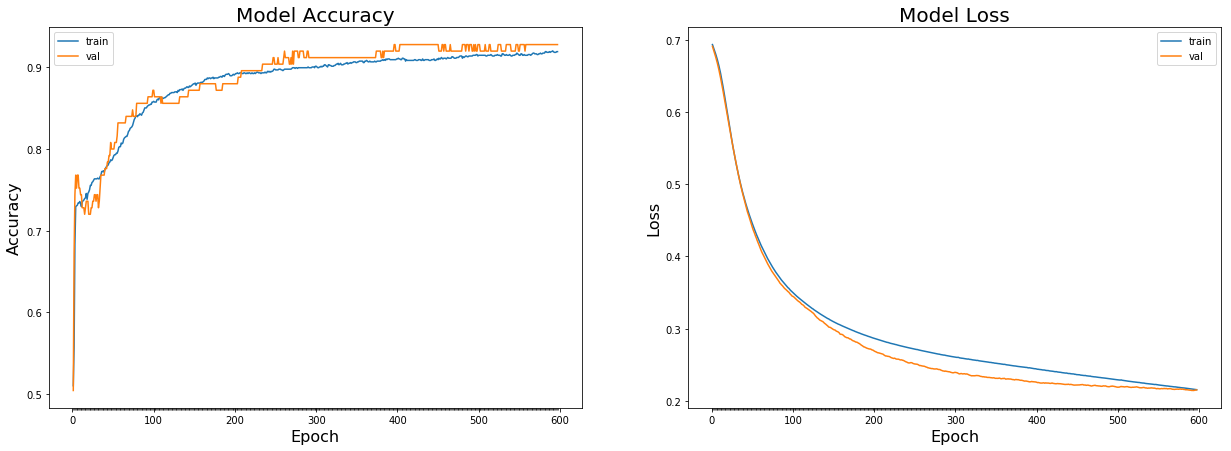


0.8949343339587242

             precision    recall  f1-score   support

          0      0.916     0.858     0.886       253
          1      0.878     0.929     0.903       280

avg / total      0.896     0.895     0.895       533



In [10]:
def baseline_model():
    """Creating baseline dense neural network"""
    
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=9, kernel_initializer='normal', activation='relu')) # input
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # output
    return model

# Create the KerasClassifier for use in scikit-learn
estimator = KerasClassifier(build_fn=baseline_model)

# Define early stopping callback
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=200, verbose=0, mode='auto')
callbacks_list = [earlystop]

# Fit estimator
model_info = estimator.fit(X_train, y_train, batch_size=300, epochs=1000, validation_split=0.1, verbose=0, callbacks=callbacks_list)

# Predict
y_pred = estimator.predict(X_test).flatten()

# Plot model history
plot_model_history(model_info)

# Calculate different metrics
print()
print(metrics.accuracy_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred, digits=3))